### 任务描述
学习数组分组方法，完成相应习题。
### 相关知识




分组聚合的流程主要有三步：

- 分割步骤：将`DataFrame`按照指定的键分割成若干组；

- 应用步骤：对每个组应用函数，通常是累计、转换或过滤函数；

- 组合步骤：将每一组的结果合并成一个输出数组。

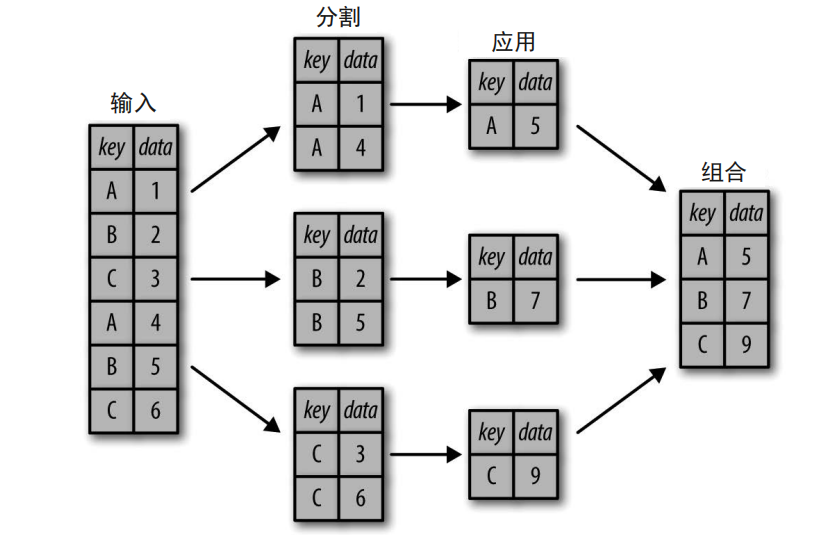




#### 分组示例

In [69]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [38]:
df

,A,B,C,D
0,foo,one,0.800706,0.531509
1,bar,one,0.396428,0.883321
2,foo,two,1.021042,-0.118660
3,bar,three,1.032730,0.782045
4,foo,two,1.800271,-1.185777
5,bar,two,-1.052870,0.882341
6,foo,one,0.513324,-0.951464
7,foo,three,-1.192385,-0.481407


In [48]:
for k,v in df.groupby('A'):
    print("分组的key是:",k)
    print("分组的value是：" ,v)

分组的key是: bar
分组的value是：      A      B         C         D
1  bar    one  0.396428  0.883321
3  bar  three  1.032730  0.782045
5  bar    two -1.052870  0.882341
分组的key是: foo
分组的value是：      A      B         C         D
0  foo    one  0.800706  0.531509
2  foo    two  1.021042 -0.118660
4  foo    two  1.800271 -1.185777
6  foo    one  0.513324 -0.951464
7  foo  three -1.192385 -0.481407


In [45]:
list(df.groupby('A'))[1]

('foo',      A      B         C         D
 0  foo    one  0.800706  0.531509
 2  foo    two  1.021042 -0.118660
 4  foo    two  1.800271 -1.185777
 6  foo    one  0.513324 -0.951464
 7  foo  three -1.192385 -0.481407)

In [46]:
df.groupby(['A']).get_group('foo')

,A,B,C,D
0,foo,one,0.800706,0.531509
2,foo,two,1.021042,-0.118660
4,foo,two,1.800271,-1.185777
6,foo,one,0.513324,-0.951464
7,foo,three,-1.192385,-0.481407


In [73]:
df.groupby(['A']).agg(['sum','min','mean'])

C                             D                    
          sum       min      mean       sum       min      mean
A                                                              
bar -0.835288 -0.916169 -0.278429 -1.033923 -1.777197 -0.344641
foo  4.450461  0.327835  0.890092  2.350104 -0.917396  0.470021

In [51]:
df

,A,B,C,D
0,foo,one,0.800706,0.531509
1,bar,one,0.396428,0.883321
2,foo,two,1.021042,-0.118660
3,bar,three,1.032730,0.782045
4,foo,two,1.800271,-1.185777
5,bar,two,-1.052870,0.882341
6,foo,one,0.513324,-0.951464
7,foo,three,-1.192385,-0.481407


In [50]:
list(df.groupby(['A','B']))

[(('bar', 'one'),      A    B         C         D
  1  bar  one  0.396428  0.883321),
 (('bar', 'three'),      A      B        C         D
  3  bar  three  1.03273  0.782045),
 (('bar', 'two'),      A    B        C         D
  5  bar  two -1.05287  0.882341),
 (('foo', 'one'),      A    B         C         D
  0  foo  one  0.800706  0.531509
  6  foo  one  0.513324 -0.951464),
 (('foo', 'three'),      A      B         C         D
  7  foo  three -1.192385 -0.481407),
 (('foo', 'two'),      A    B         C         D
  2  foo  two  1.021042 -0.118660
  4  foo  two  1.800271 -1.185777)]

In [59]:
df.groupby('A').C.max()

A
bar    1.032730
foo    1.800271
Name: C, dtype: float64

In [65]:
df = pd.DataFrame({'data1':np.random.rand(2),
                  'data2':np.random.rand(2),
                  'key1':['a','b'],
                  'key2':['one','two']})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
data1    2 non-null float64
data2    2 non-null float64
key1     2 non-null object
key2     2 non-null object
dtypes: float64(2), object(2)
memory usage: 192.0+ bytes


In [64]:
for k, v in df.groupby(df.dtypes, axis=1):
    print(k)
    print(v)
    print("*"*10)

float64
      data1     data2
0  0.448445  0.568887
1  0.567963  0.246263
**********
object
  key1 key2
0    a  one
1    b  two
**********


In [66]:
df = pd.DataFrame(np.arange(16).reshape(4,4),
                  columns = ['a','b','c','d'])
print(df)
print('-----')

mapping = {'a':'one','b':'one','c':'two','d':'two','e':'three'}
by_column = df.groupby(mapping, axis = 1)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
-----


In [67]:
by_column.sum()

,one,two
0,1,5
1,9,13
2,17,21
3,25,29


In [68]:
df = pd.DataFrame(np.arange(16).reshape(4,4),
                  columns = ['a','b','c','d'],
                 index = ['abc','bcd','aa','b'])
print(df,'\n')
print(df.groupby(len).sum())

      a   b   c   d
abc   0   1   2   3
bcd   4   5   6   7
aa    8   9  10  11
b    12  13  14  15 

    a   b   c   d
1  12  13  14  15
2   8   9  10  11
3   4   6   8  10


In [ ]:

print(df)
print('------')

print(df.groupby('A'), type(df.groupby('A')))
print('------')
# 直接分组得到一个groupby对象，是一个中间数据，没有进行计算

a = df.groupby('A').mean()
b = df.groupby(['A','B']).mean()
c = df.groupby(['A'])['D'].mean()  # 以A分组，算D的平均值
print(a,type(a),'\n',a.columns)
print(b,type(b),'\n',b.columns)
print(c,type(c))
# 通过分组后的计算，得到一个新的dataframe
# 默认axis = 0，以行来分组
# 可单个或多个（[]）列分组

#### 分组 - 可迭代对象

df = pd.DataFrame({'X' : ['A', 'B', 'A', 'B'], 'Y' : [1, 4, 3, 2]})
print(df)
print(df.groupby('X'), type(df.groupby('X')))
print('-----')

print(list(df.groupby('X')), '→ 可迭代对象，直接生成list\n')
print(list(df.groupby('X'))[0], '→ 以元祖形式显示\n')
for n,g in df.groupby('X'):
    print(n)
    print(g)
    print('###')
print('-----')
# n是组名，g是分组后的Dataframe



print(df.groupby(['X']).get_group('A'),'\n')
print(df.groupby(['X']).get_group('B'),'\n')
print('-----')
# .get_group()提取分组后的组

grouped = df.groupby(['X'])
print(grouped.groups)
print(grouped.groups['A'])  # 也可写：df.groupby('X').groups['A']
print('-----')
# .groups：将分组后的groups转为dict
# 可以字典索引方法来查看groups里的元素


sz = grouped.size()
print(sz,type(sz))
print('-----')
# .size()：查看分组后的长度

df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
grouped = df.groupby(['A','B']).groups
print(df)
print(grouped)
print(grouped[('foo', 'three')])
# 按照两个列进行分组

#### 其他轴上的分组


df = pd.DataFrame({'data1':np.random.rand(2),
                  'data2':np.random.rand(2),
                  'key1':['a','b'],
                  'key2':['one','two']})
print(df)
print(df.dtypes)
print('-----')
for n,p in df.groupby(df.dtypes, axis=1):
    print(n)
    print(p)
    print('##')
# 按照值类型分列

#### 通过字典或者Series分组


df = pd.DataFrame(np.arange(16).reshape(4,4),
                  columns = ['a','b','c','d'])
print(df)
print('-----')

mapping = {'a':'one','b':'one','c':'two','d':'two','e':'three'}
by_column = df.groupby(mapping, axis = 1)
print(by_column.sum())
print('-----')
# mapping中，a、b列对应的为one，c、d列对应的为two，以字典来分组

s = pd.Series(mapping)
print(s,'\n')
print(s.groupby(s).count())
# s中，index中a、b对应的为one，c、d对应的为two，以Series来分组

#### 通过函数分组


df = pd.DataFrame(np.arange(16).reshape(4,4),
                  columns = ['a','b','c','d'],
                 index = ['abc','bcd','aa','b'])
print(df,'\n')
print(df.groupby(len).sum())
# 按照字母长度分组

#### 应用多个聚合函数

```python
df.groupby().agg([np.sum,np.mean,np.std])
```

### 编程要求
现有如下数据：
country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent

Africaghanistan,0,0,0,0,Asia

Albania,89,132,54,4.9,Europe

Algeria,25,0,14,0.7,Africa

Andorra,245,138,312,12.4,Europe

Angola,217,57,45,5.9,Africa

其中第一行为列名，各列名含义如下：

country	国家名

beer_servings	啤酒消耗量

spirit_servings	白酒消耗量

wine_servings	红酒消耗量

total_litres_of_pure_alcohol	纯酒精总量

continent	大洲名

请根据continent列进行分组,并求每个大洲红酒消耗量的最大值与最小值之差以及啤酒消耗量的和。

In [ ]:
#请在此处编写代码
